In [14]:
import numpy as np
from CADMium import Psgrid
from CADMium import Kohnsham

#Distance of the nucley from grid center
a =  1.0

#Nuclear charges on centers AB
Za  = 1
Zb = 0

#Set polaization. 1 Unpolarized, 2 Polarized
pol = 1

Nmo = [[1]]
N   = [[1]]

optKS = {
        "interaction_type" : "dft",
        "SYM" : False,
        "FRACTIONAL" : True,
        }

#Grid Options
NP = 7 #Number of points per block
NM =  [10,10] #Number of blocks [angular, radial]
L = np.arccosh(15./a) #Maximum radial coordinate value
loc = np.array(range(-4,5)) #Non inclusive on upper bound

#Create and initialize grid object
grid = Psgrid(NP, NM, a, L, loc)
grid.initialize()

#Kohn Sham object
KS = Kohnsham(grid, Za, Zb, pol, Nmo, N, optKS)
KS.scf(optKS)

print(f" Total Energy: {KS.E.E}")

 Constructing integration weights ... 

 Building finite difference opperators ... 

 Factorizing Laplacian ... 

 Done
 iter    Total Energy     HOMO Eigenvalue         Res       

----------------------------------------------------------- 

   1         -0.489          -0.211            1.0
   2         -0.463          -0.225            0.05631293883056992
   3         -0.452          -0.230            0.023026066194489794
   4         -0.448          -0.232            0.009156071771385601
   5         -0.447          -0.233            0.0036089134866941234
   6         -0.446          -0.233            0.0014114091485204847
   7         -0.446          -0.233            0.0005506055154164326
   8         -0.446          -0.233            0.00021310404669638635
   9         -0.446          -0.233            8.169244701043032e-05
   10         -0.446          -0.233            3.091585862207311e-05
   11         -0.446          -0.233            1.148835013059836e-05
   12         -0

In [15]:
KS.E.__dict__

mappingproxy({'__module__': 'CADMium.kohnsham.kohnsham',
              '__dict__': <attribute '__dict__' of 'E' objects>,
              '__weakref__': <attribute '__weakref__' of 'E' objects>,
              '__doc__': None,
              'Ex': -0.19307122521840103,
              'Ec': -0.039406988200846295,
              'Eks': array([[-0.23345566]]),
              'Vks': array([[-0.65831868]]),
              'Ts': 0.4248630210754473,
              'evals': array([], dtype=float64),
              'Enuc': -0.9208210550316709,
              'Vext': 0.0,
              'Vhxc': 0.2625014763617079,
              'Eh': 0.28276870413271915,
              'Et': -0.44566754324275176,
              'Vnn': 0.0,
              'E': -0.44566754324275176})

In [22]:
#Visualize components
import matplotlib.pyplot as plt

vext,x,y = grid.plotter(KS.vext)
vh,_,_ = grid.plotter(KS.V.vh)
vxc,_,_ = grid.plotter(KS.V.vx + KS.V.vc)

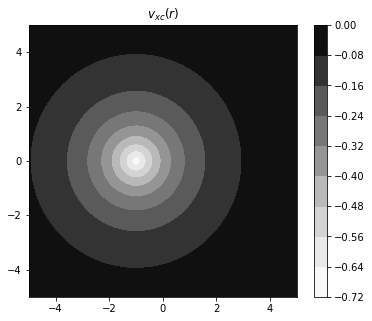

In [23]:
fig = plt.figure(figsize=(6,5))

plt.xlim(-5,5)
plt.ylim(-5,5)

plt.title("$v_{xc}(r)$")

plt.contourf(x,y,vxc, 
             levels=10,
             cmap="Greys",
             antialiased = False,
             linestyles = "dotted",
            )

plt.colorbar()
plt.show()

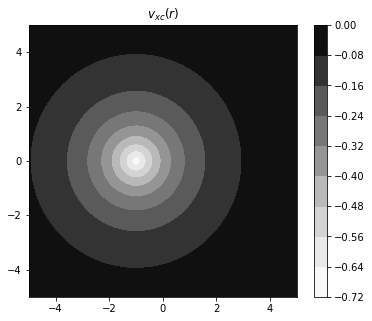

In [24]:
fig = plt.figure(figsize=(6,5))

plt.xlim(-5,5)
plt.ylim(-5,5)

plt.title("$v_{xc}(r)$")

plt.contourf(x,y,vxc, 
             levels=10,
             cmap="Greys",
             antialiased = False,
             linestyles = "dotted",
            )

plt.colorbar()
plt.show()

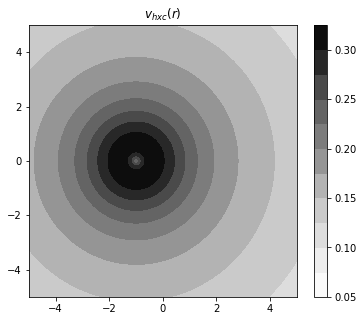

In [25]:
fig = plt.figure(figsize=(6,5))

plt.xlim(-5,5)
plt.ylim(-5,5)

plt.title("$v_{hxc}(r)$")

plt.contourf(x,y,vxc + vh, 
             levels=10,
             cmap="Greys",
             antialiased = False,
             linestyles = "dotted",
            )

plt.colorbar()
plt.show()

The fact that the addition of the hartree, exchange, and correlation potentials does not equal zero for a system of one electron is the so-called "self-interaction error", and most density functial approximations suffer it. 

In [26]:
#Extract components along the z axis
x, v_hartree = grid.plot_along_axis(KS.V.vh)
_, v_xc      = grid.plot_along_axis(KS.V.vx + KS.V.vc)

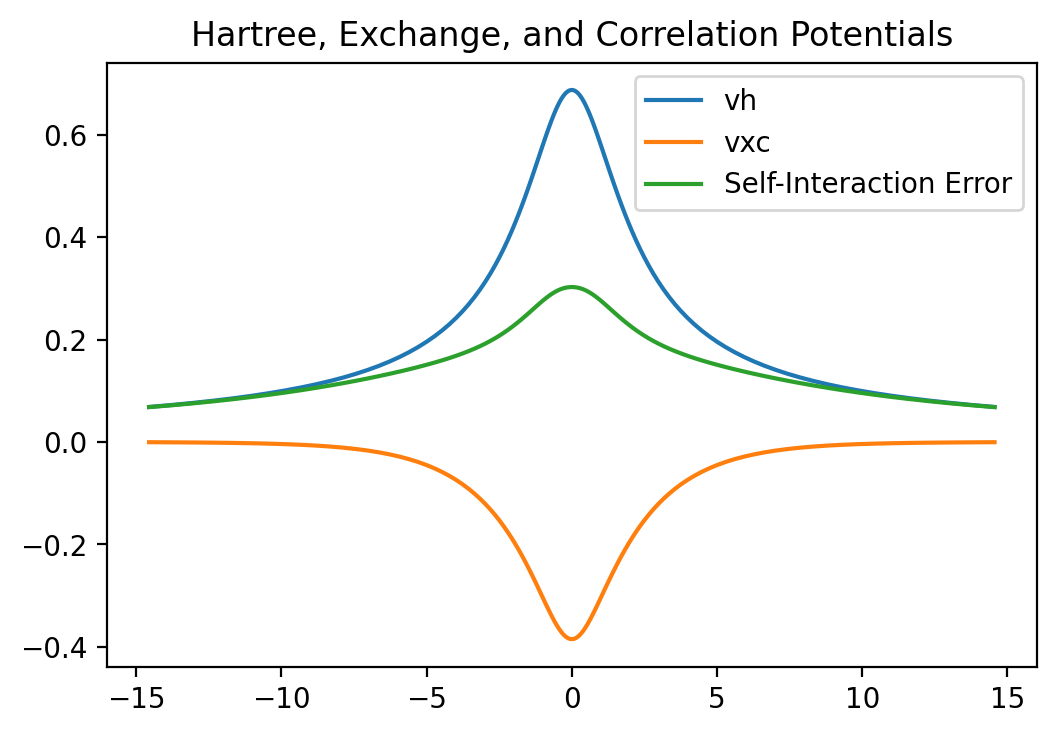

In [27]:
fig = plt.figure(dpi=200)

plt.title("Hartree, Exchange, and Correlation Potentials") 

plt.plot(x, v_hartree, label="vh")
plt.plot(x, v_xc, label="vxc")
plt.plot(x, v_hartree + v_xc, label="Self-Interaction Error")


plt.legend()
plt.show()